# **<span style="color:blue">HEART DISEASE PREDICTION**🔥🔥

<img style="float: center;" src="https://timesofindia.indiatimes.com/thumb/msid-71058199,width-1200,height-900,resizemode-4/.jpg" width="500px"/>

**World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.**

# Problem Definition:
 
Given clinical parameters about a patient, can we predict whether or not they have heart disease?

# Introduction:

> We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. In this kernel I have performed Exploratory Data Analysis on the Heart Diseases UCI and tried to identify relationship between heart disease  and various other features. After EDA data pre-processing is done I have applied k-NN(k-Nearest Neighbors) method and Logistic Regression Algorithm to make the predictions.


# Content:


* **INTRODUCTION**
* **DATASET COLUMNS FEATURE EXPLAIN**
* **INVESTIGATING THE DATA and EXPLORATORY DATA ANALSIS**
* **One Visualization to Rule Them All**
* **Age Analysis**
* **Sex (Gender) Analysis**
* **Chest Pain Type Analysis**
* **Age Range Analysis**
* **Thalach Analysis**
* **Thal Analysis**
* **Target Analysis**
* **MODEL, TRAINING and TESTING**
* **Logistic Regression**
* **K-Nearest Neighbors**

# Dataset:

The Dataset contains the following features:<br>

**1. age(in years)**<br>
**2. sex:** (1 = male; 0 = female)<br>
**3. cp:** chest pain type<br>
**4. trestbps:** resting blood pressure (in mm Hg on admission to the hospital)<br>
**5. chol:** serum cholestoral in mg/dl<br>
**6. fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
**7. restecg:** resting electrocardiographic results<br>
**8. thalach:** maximum heart rate achieved<br>
**9. exang:** exercise induced angina (1 = yes; 0 = no)<br>
**10. oldpeak**: ST depression induced by exercise relative to rest<br>
**11. slope:** the slope of the peak exercise ST segment<br>
**12. ca:** number of major vessels (0-3) colored by flourosopy<br>
**13. thal:** 3 = normal; 6 = fixed defect; 7 = reversable defect<br>
**14. target:** 1 or 0 <br>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

### **Importing required libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### **Loading the data**

In [4]:
df = pd.read_csv('../input/heart-disease-uci/heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


### **Features of the data set**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Dimensions of the dataset

In [6]:
print('Number of rows in the dataset: ',df.shape[0])
print('Number of columns in the dataset: ',df.shape[1])

Number of rows in the dataset:  303
Number of columns in the dataset:  14


# Checking for null values in the dataset

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no null values in the dataset

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**The features described in the above data set are:**

**1. Count** tells us the number of NoN-empty rows in a feature.<br>

**2. Mean** tells us the mean value of that feature.<br>

**3. Std** tells us the Standard Deviation Value of that feature.<br>

**4. Min** tells us the minimum value of that feature.<br>

**5. 25%**, **50%**, and **75%** are the percentile/quartile of each features.<br>

**6. Max** tells us the maximum value of that feature.<br>


# Checking features of various attributes

#### **1. Sex**

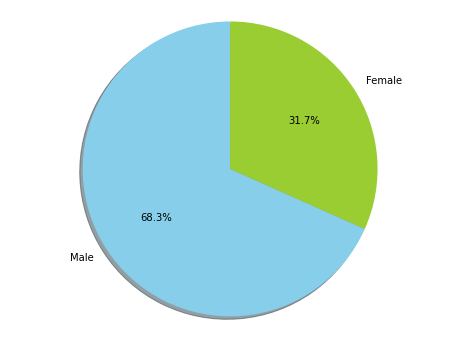

In [9]:
male =len(df[df['sex'] == 1])
female = len(df[df['sex']== 0])

plt.figure(figsize=(8,6))

# Data to plot
labels = 'Male','Female'
sizes = [male,female]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

#### **2. Chest Pain Type**

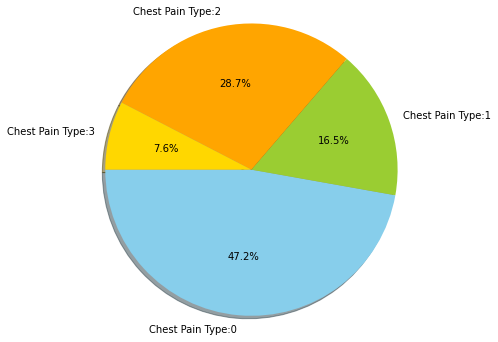

In [10]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(df[df['cp'] == 0]),len(df[df['cp'] == 1]),
         len(df[df['cp'] == 2]),
         len(df[df['cp'] == 3])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0, 0,0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

#### **3. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)**

In [ ]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'
sizes = [len(df[df['fbs'] == 0]),len(df[df['cp'] == 1])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

#### **4.exang: exercise induced angina (1 = yes; 0 = no)**

In [ ]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'No','Yes'
sizes = [len(df[df['exang'] == 0]),len(df[df['exang'] == 1])]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

### **Exploratory Data Analysis**

In [ ]:
sns.set_style('whitegrid')

#### **1. Heatmap**

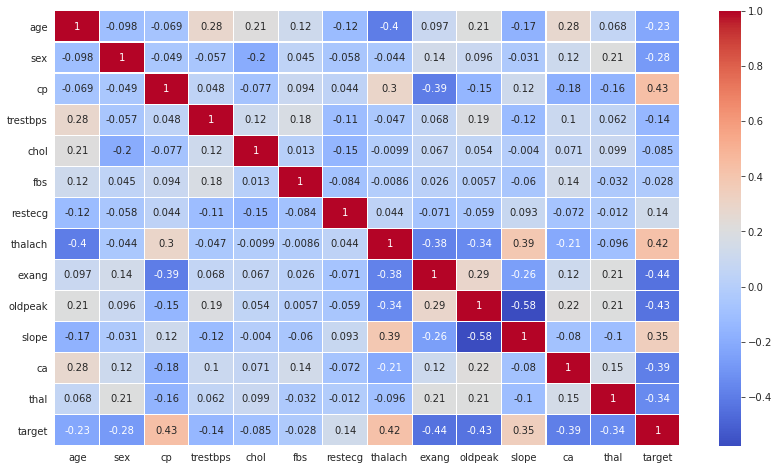

In [14]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

#### **Plotting the distribution of various attribures**

#### **1. thalach: maximum heart rate achieved**

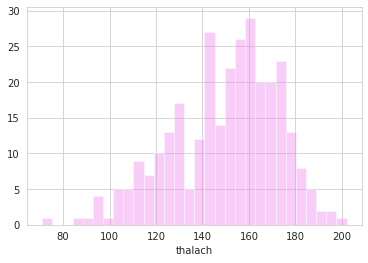

In [15]:
sns.distplot(df['thalach'],kde=False,bins=30,color='violet')

**2.chol: serum cholestoral in mg/dl**

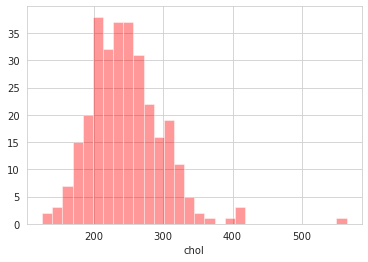

In [16]:
sns.distplot(df['chol'],kde=False,bins=30,color='red')
plt.show()

#### **3. trestbps: resting blood pressure (in mm Hg on admission to the hospital)**

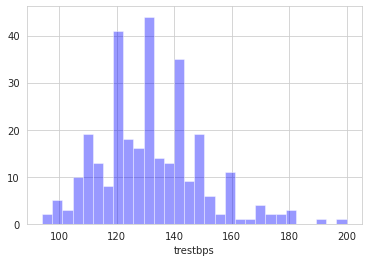

In [17]:
sns.distplot(df['trestbps'],kde=False,bins=30,color='blue')
plt.show()

**4. Number of people who have heart disease according to age**

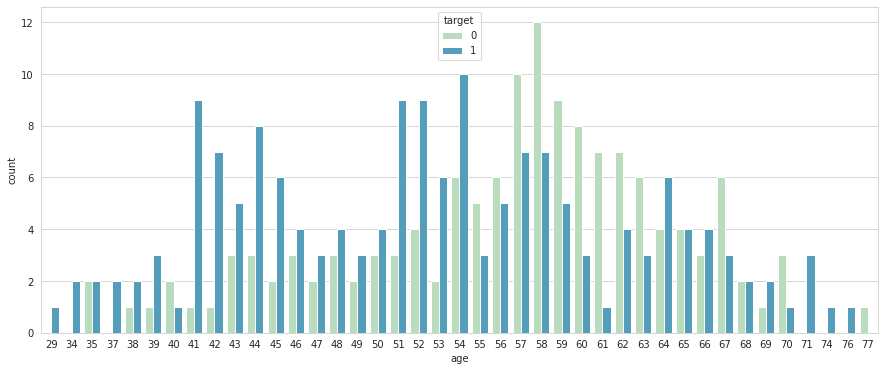

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
plt.show()

**5. Scatterplot for thalach vs. chol**

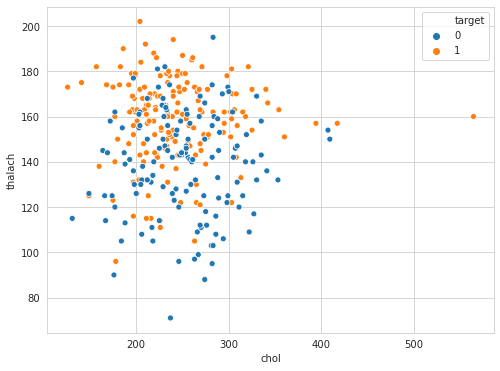

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thalach',data=df,hue='target')
plt.show()

**6. Scatterplot for thalach vs. trestbps**

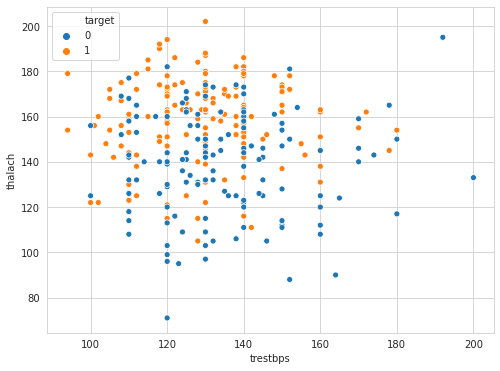

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df,hue='target')
plt.show()

# Making Predictions

**Splitting the dataset into training and test set**

In [21]:
X= df.drop('target',axis=1)
y=df['target']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

# Preprocessing - Scaling the features

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

# 1. k-Nearest Neighor Algorithm

**Implementing GridSearchCv to select best parameters and applying k-NN Algorithm**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn =KNeighborsClassifier()
params = {'n_neighbors':list(range(1,20)),
    'p':[1, 2, 3, 4,5,6,7,8,9,10],
    'leaf_size':list(range(1,20)),
    'weights':['uniform', 'distance']
         }

In [26]:
model = GridSearchCV(knn,params,cv=3, n_jobs=-1)

In [ ]:
model.fit(X_train,y_train)
model.best_params_           #print's parameters best values

# Making predictions

In [ ]:
predict = model.predict(X_test)

# Checking accuracy

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using k-NN we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

# Confusion Matrix

In [ ]:

cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

In [ ]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for k-Nearest Neighbors Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**Classification report**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predict))

**Receiver Operating Characterstic(ROC) Curve**

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

In [ ]:
#Get predicted probabilites from the model
y_probabilities = model.predict_proba(X_test)[:,1]

In [ ]:
#Create true and false positive rates
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(y_test,y_probabilities)

In [ ]:
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn,true_positive_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

# 2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [ ]:
# Setting parameters for GridSearchCV
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
log_model = GridSearchCV(log,param_grid=params,cv=10)

In [ ]:
log_model.fit(X_train,y_train)

# Printing best parameters choosen through GridSearchCV
log_model.best_params_

**Making predictions**

In [ ]:
predict = log_model.predict(X_test)

**Accuracy Metrics**

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using Logistic Regression we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

In [ ]:
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
print(classification_report(y_test,predict))

**Confusion Matrix**

In [ ]:
cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

In [ ]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Logisitic Regression Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**Receiver Operating Characterstic(ROC) Curve**

In [ ]:
#Get predicted probabilites
target_probailities_log = log_model.predict_proba(X_test)[:,1]

In [ ]:
#Create true and false positive rates
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)

In [ ]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [ ]:
#Calculate area under the curve
roc_auc_score(y_test,target_probailities_log)

## **3. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [ ]:
#Setting parameters for GridSearchCV
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_model = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [ ]:
tree_model.fit(X_train,y_train)
#Printing best parameters selected through GridSearchCV
tree_model.best_params_

**Making predictions**

In [ ]:
predict = tree_model.predict(X_test)

**Accuracy Metrics**

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using Decision Tree we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

In [ ]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

**Classification Report**

In [ ]:
print(classification_report(y_test,predict))

**Confusion Matrix**

In [ ]:
cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

In [ ]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**Receiver Operating Characterstic(ROC) Curve**

In [ ]:
#Get predicted probabilites
target_probailities_tree = tree_model.predict_proba(X_test)[:,1]

In [ ]:
#Create true and false positive rates
tree_false_positive_rate,tree_true_positive_rate,tree_threshold = roc_curve(y_test,
                                                             target_probailities_tree)

In [ ]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_rate,tree_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [ ]:
#Calculate area under the curve
roc_auc_score(y_test,target_probailities_tree)

**Comparing ROC Curve of k-Nearest Neighbors, Logistic Regression and Decision Tree**

In [ ]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(false_positive_rate_knn,true_positive_rate_knn,label='k-Nearest Neighbor')
plt.plot(log_false_positive_rate,log_true_positive_rate,label='Logistic Regression')
plt.plot(tree_false_positive_rate,tree_true_positive_rate,label='Decision Tree')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()